# State Farm Distracted Driver Detection
## Can computer vision spot distracted drivers?

### Background:
1. Nearly 4,000 people were killed in crashes involving distracted drivers in 2015. Distracted driving was the reported cause of death of 3,450 people in 2016. An estimated 391,000 drivers were injured in distracted driving crashes in 2017 (Motor Vehicle Crash report for 2019)
2. Available camera that could realtime monitoring the driver from distracted

### Aim:
A deep learning 

### Data sources:
Dataset is available from  https://www.kaggle.com/c/state-farm-distracted-driver-detection

## TASK 1: Feature engineering and EDA

In [27]:
import pandas as pd
import numpy as np
import os
import cv2
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt
import random
from PIL import Image

from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop,Adam
from sklearn.model_selection import train_test_split
import tensorflow as tf
print(tf.__version__)

2.0.0


## Import the Datasets
Import the .csv file to read the labels.

In [2]:
dataset = pd.read_csv('../Distracted_dvr_data/driver_imgs_list.csv')
dataset.head(5)

subject classname            img
0    p002        c0  img_44733.jpg
1    p002        c0  img_72999.jpg
2    p002        c0  img_25094.jpg
3    p002        c0  img_69092.jpg
4    p002        c0  img_92629.jpg

In [9]:
by_drivers = dataset.groupby('classname')
unique_drivers = by_drivers.groups.keys()
print(unique_drivers)

dict_keys(['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9'])


In [10]:
classes = ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']

class_def = {'c0': 'safe driving',
'c1': 'texting - right',
'c2': 'talking on the hone - right',
'c3': 'texting - left',
'c4': 'talking on the phone - left',
'c5': 'operating the radio',
'c6': 'drinking',
'c7': 'reaching behind',
'c8': 'hair and makeup',
'c9': 'talking to passenger'}

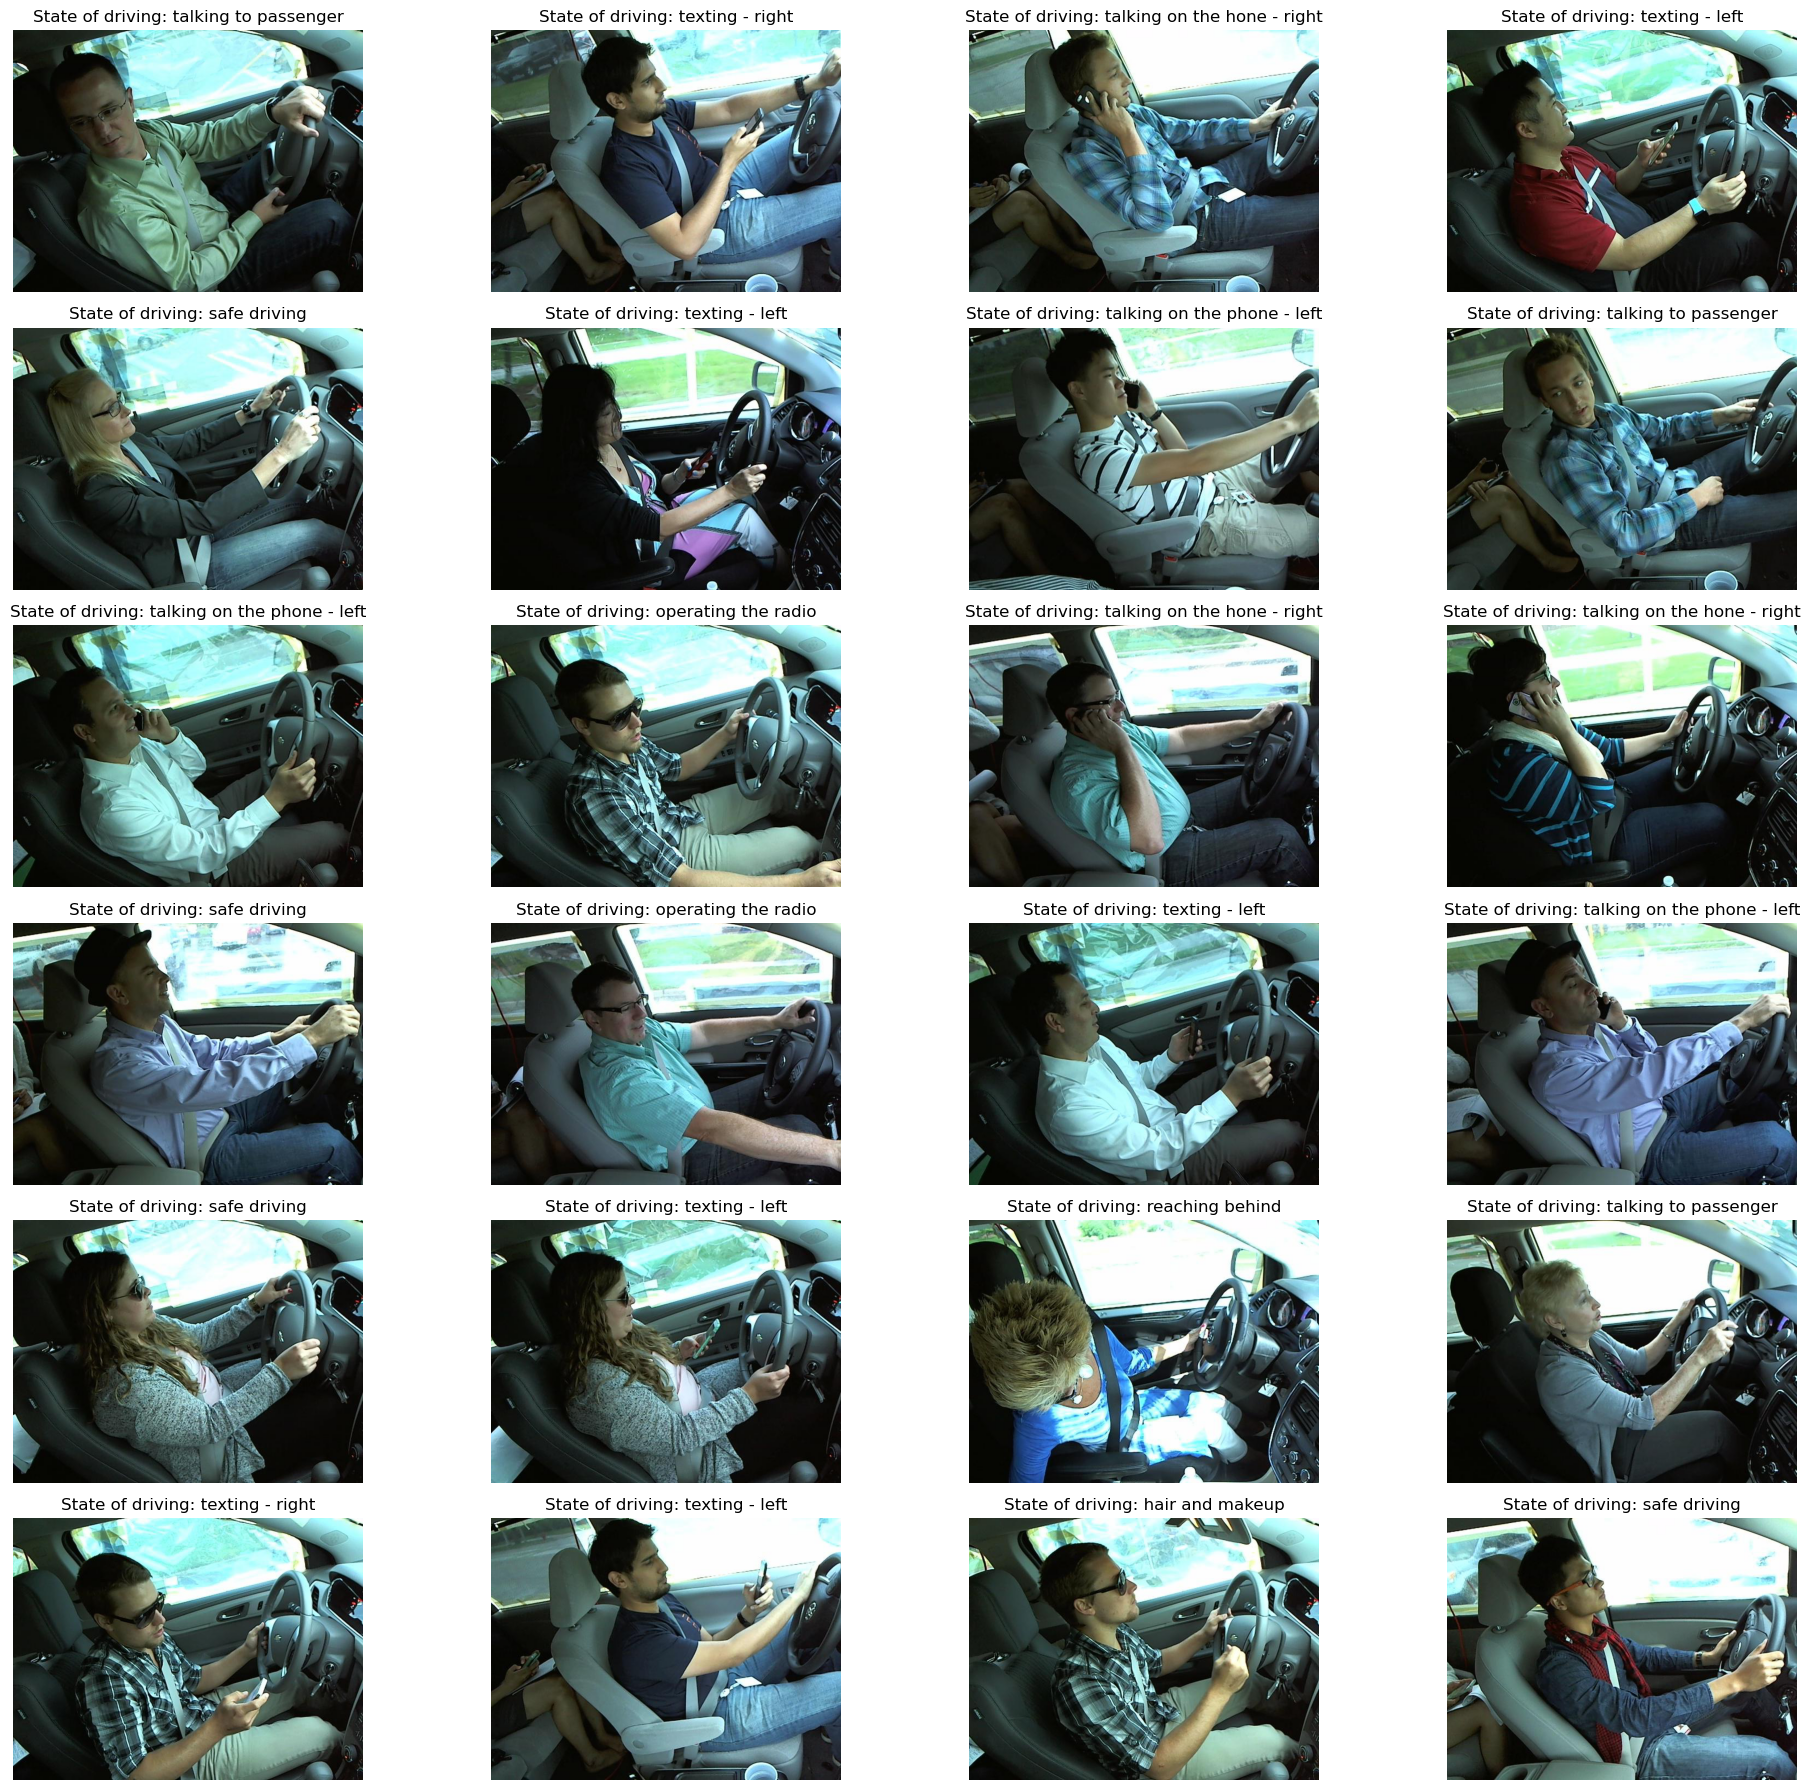

In [19]:
fig = plt.figure(figsize=(20, 18))
columns = 4
rows = 6
for i in range(1, columns*rows +1):
    pic_idx = random.randint(0, dataset.shape[0])
    im = Image.open(r"../Distracted_dvr_data/imgs/train/"+ 
                    str(dataset.loc[pic_idx, 'classname']) +'/' 
                    +str(dataset.loc[pic_idx, 'img' ]))
    fig.add_subplot(rows, columns, i)
    plt.imshow(im)
    plt.title('State of driving: ' + class_def[(dataset.loc[pic_idx, 'classname'])])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [24]:
# check size of each image 
im = Image.open("../Distracted_dvr_data/imgs/train/c7/img_100702.jpg")
w, h = im.size
print('Size the image is ' + str(im.size))

Size the image is (640, 480)


In [25]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [26]:
image_size = (256, 256)
val_frac = 0.12
batch_size = 16
train_dir = "../Distracted_dvr_data/imgs/train/"

train_generator = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                             labels = 'inferred',
                                                             label_mode='categorical',
                                                             image_size=image_size,
                                                             batch_size=batch_size,
                                                             seed=1,
                                                             shuffle=True,
                                                             validation_split=val_frac,
                                                             subset='training')
val_generator = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                             labels = 'inferred',
                                                             label_mode='categorical',
                                                             image_size=image_size,
                                                             batch_size=batch_size,
                                                             seed=1,
                                                             shuffle=True,
                                                             validation_split=val_frac,
                                                             subset='validation')

AttributeError: module 'tensorflow_core.keras.preprocessing' has no attribute 'image_dataset_from_directory'

In [ ]:
def normalize(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_generator = train_generator.map(normalize)
val_generator = val_generator.map(normalize)

In [ ]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',input_shape=(256, 256, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

In [ ]:
model.compile('rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(
train_generator,
steps_per_epoch=240,
epochs=10,
validation_data=val_generator,
validation_steps=60)

In [ ]:
model.save('distracted_driver.h5')

In [ ]:
tr_loss = history.history['loss']
tr_acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']
epochs = range(1, len(tr_loss)+1)

plt.clf()
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18,5))
fig

ax1.plot(epochs, tr_loss, 'b', label='Training loss')
ax1.plot(epochs, val_loss, 'r', label='Validation loss')
ax1.set_title('Training & Validation loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

ax2.plot(epochs, tr_acc, 'b', label='Training acc')
ax2.plot(epochs, val_acc, 'r', label='Validation acc')
ax2.set_title('Training & Validation acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('accuracy')
ax2.legend()
plt.show()